<a href="https://colab.research.google.com/github/srikanth2102/Predict-the-house-prices-in-India/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

## **LOADING DATA**

In [126]:
#importing libraries
import pandas as pd

In [127]:
# uploading files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv


In [132]:
uploaded = files.upload()

In [133]:
# reading the csv files
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## **CORELATION HEATMAP** 

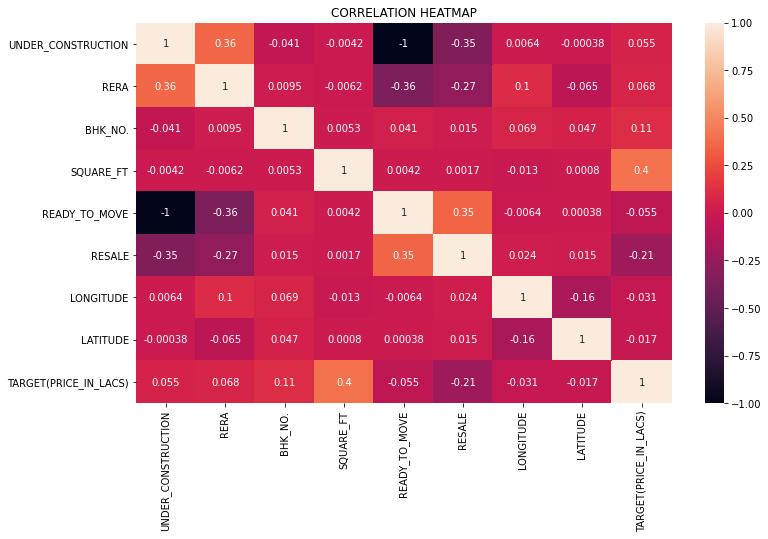

In [134]:
# plotting the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

cor= train_data.corr()

plt.figure(figsize=(12,7))
dataplot = sns.heatmap(cor, annot=True,)
plt.title('CORRELATION HEATMAP')
plt.show()

## *DROPPING ADDRESS FEATURE*

In [135]:
# dropping the Address feature
train_data.drop(['ADDRESS'],axis=1,inplace=True)
test_data.drop(['ADDRESS'],axis=1,inplace=True)

## **DATA VISUALISATION**

## *UNDER_CONSTRUCTION Vs TARGET PRICE*

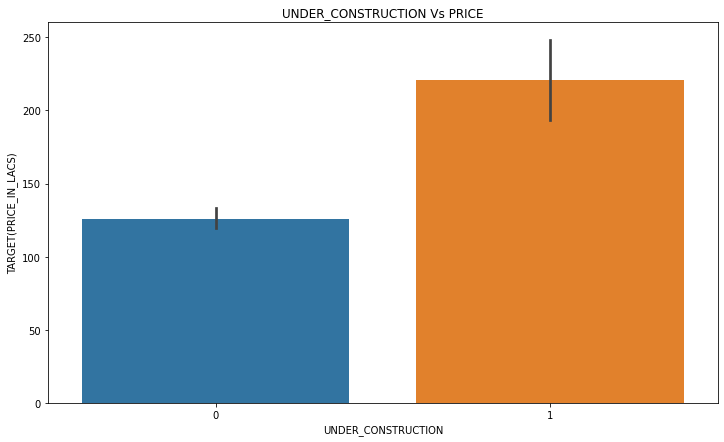

In [136]:
# plotting under_construction vs Price 
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['UNDER_CONSTRUCTION'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('UNDER_CONSTRUCTION Vs PRICE')
plt.show()

## *RERA Vs TARGET PRICE*


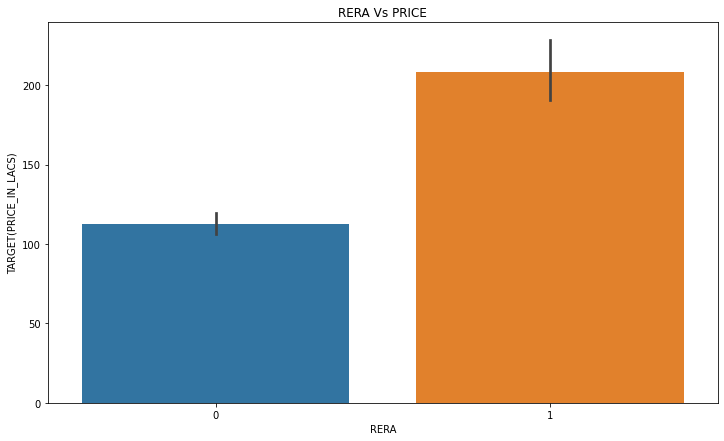

In [137]:
# plotting RERA vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RERA'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RERA Vs PRICE')
plt.show()

It is clear from the above barplot that the price of house with RERA approval is valued at a higher price than the house without a RERA approval.

## *RESALE Vs TARGET PRICE*

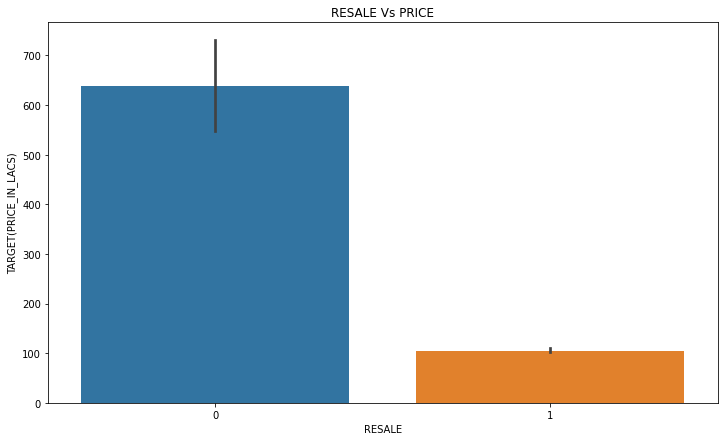

In [138]:
# plotting resale vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RESALE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RESALE Vs PRICE')
plt.show()

Its clear from the above Barplot that the price of a brand new house is higher than the price of the house which is resold.

## READY TO MOVE Vs TARGET PRICE

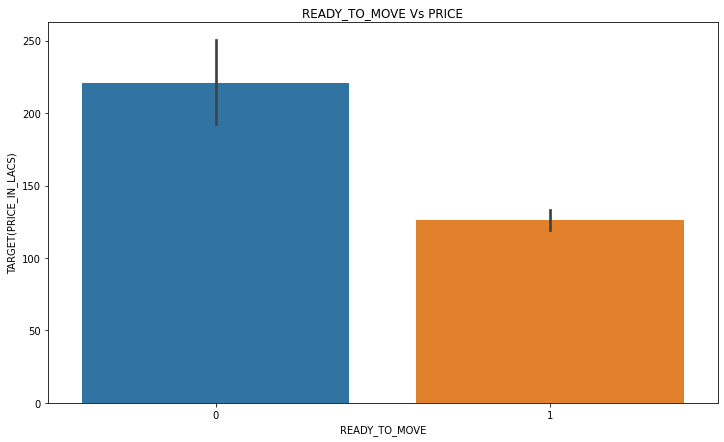

In [139]:
# plotting ready to move vs target price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['READY_TO_MOVE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('READY_TO_MOVE Vs PRICE')
plt.show()

The ready to occupy house sell for lesser price. Since most of the ready to move houses are second hand houses. 

## *BHK_OR_RK Vs TARGET PRICE*

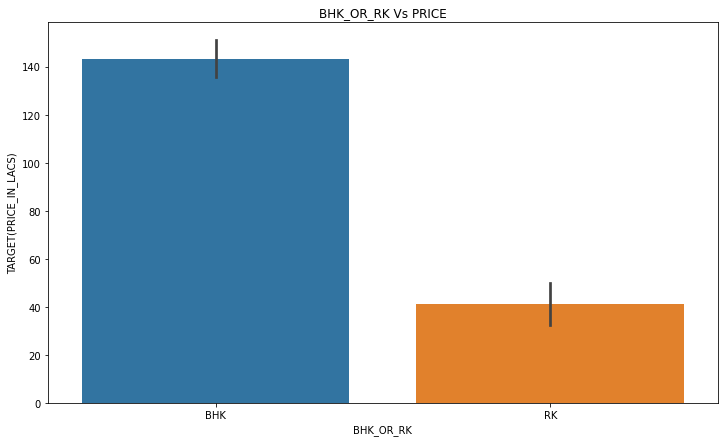

In [140]:
# plotting BHK_OR_RK vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_OR_RK'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_OR_RK Vs PRICE')
plt.show()

The price of house with BHK(bedroom, hall, room) is costlier than a house with only RK(room, Kichen).

## *POSTED_BY Vs TARGET PRICE*

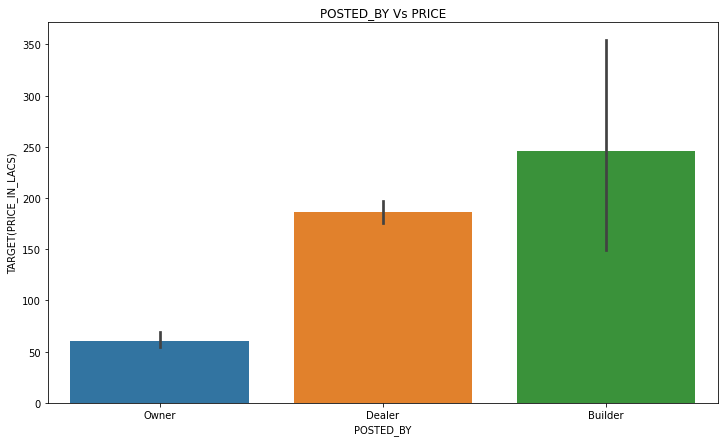

In [141]:
# plotting posted_by vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['POSTED_BY'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('POSTED_BY Vs PRICE')
plt.show()

The houses posted by Builder gets sold for higher price, followed by dealer

## *BHK_NO. Vs TARGET PRICE*

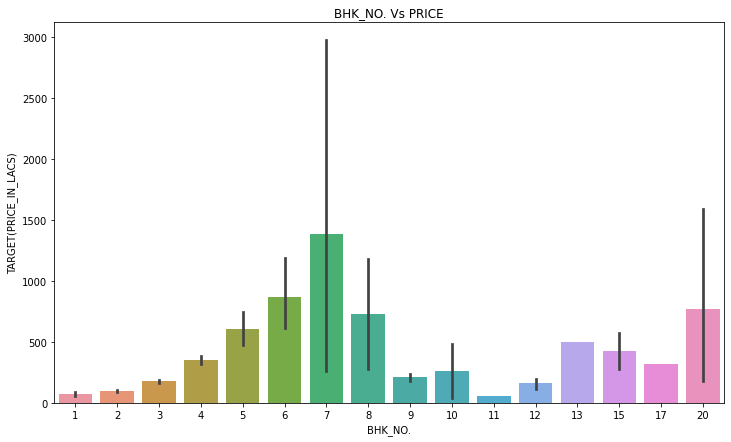

In [142]:
# plotting BHK_NO vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_NO.'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_NO. Vs PRICE')
plt.show()

From this we can see that there is a linear realtion between no.of.bedrooms and price until 7 bhk and then there isnt a precise patters.

## *SQUARE_FT Vs TARGET FEATURE*

<Figure size 864x504 with 0 Axes>

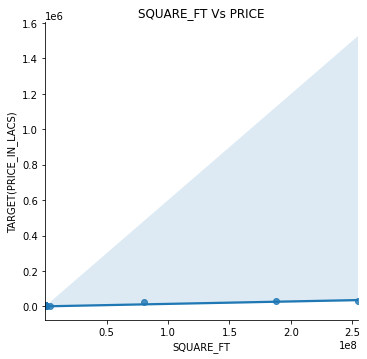

In [143]:
# plotting Square_feet vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('SQUARE_FT Vs PRICE')
plt.show()

From this graph we can clearly understand that the price of house increases with increse in Sq feet.

## *LONGITUDE Vs TARGET PRICE*

<Figure size 864x504 with 0 Axes>

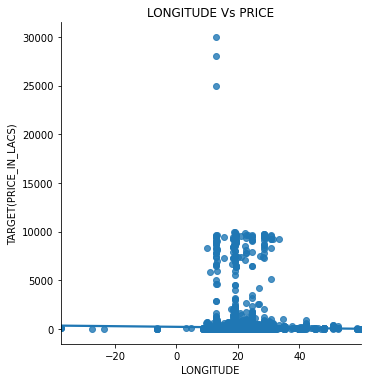

In [144]:
# plotting longitud vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LONGITUDE Vs PRICE')
plt.show()

## *LATITUDE Vs TARET PRICE*

<Figure size 864x504 with 0 Axes>

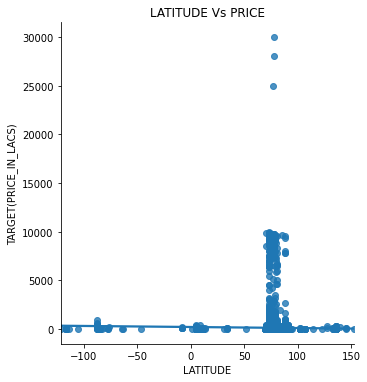

In [145]:
# plotting latitude vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LATITUDE Vs PRICE')
plt.show()

In [146]:
# dropping longitude and latitude features
train_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)
test_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)

We can drop longitude and latitude as there is no clear correlation between them and the price.

## **CONVERTING CATEGORICAL DATA TO NUMERICAL VALUES**

In [147]:
# mapping the categorical data to numerical values
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
train_data['POSTED_BY'] = train_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})

In [148]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,1,1,545.171340,1,1
1,2,1,1,2,1,800.000000,0,0
2,2,0,0,2,1,1257.096513,1,1
3,2,0,0,3,1,1400.329489,1,1
4,1,0,0,1,1,430.477830,1,1


In [149]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,1,1300.236407,1,1,55.0
1,2,0,0,2,1,1275.000000,1,1,51.0
2,1,0,0,2,1,933.159722,1,1,43.0
3,1,0,1,2,1,929.921143,1,1,62.5
4,2,1,0,2,1,999.009247,0,1,60.5


## **TRAIN VALIDATION SPLIT**

In [150]:
# spliting features and label

Y = train_data['TARGET(PRICE_IN_LACS)']
train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1, inplace=True)

In [151]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,2,1,1300.236407,1,1
1,2,0,0,2,1,1275.000000,1,1
2,1,0,0,2,1,933.159722,1,1
3,1,0,1,2,1,929.921143,1,1
4,2,1,0,2,1,999.009247,0,1


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
print('train features shape:', X_train.shape,';','train label shape:', Y_train.shape)
print('validation features shape:', X_val.shape,';','validation label shape:', Y_val.shape)

train features shape: (26505, 10) ; train label shape: (26505,)
validation features shape: (2946, 10) ; validation label shape: (2946,)


## **MODEL SELECTION**

*   Linear Regression
*   Support vector machine
*   Decision Tree
*   Random Forest
*   Gradient Boosting
*   MLP Regressor



## *LINEAR REGRESSION*

In [153]:
# creating a dictionary to store the score of models
models = dict()

In [154]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

# fitting the model
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", lin_reg.score(X_train,Y_train))
print("Score on validation data:", lin_reg.score(X_val,Y_val))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score on training data: 0.1440339586818038
Score on validation data: 0.5028438796913254


In [155]:
models['lin_reg'] = lin_reg.score(X_val,Y_val)

## *DECISION TREE REGRESSOR*

In [156]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# fitting the model
tree = DecisionTreeRegressor()
print(tree)
tree.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", tree.score(X_train,Y_train))
print("Score on validation data:", tree.score(X_val,Y_val))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Score on training data: 0.9999585622230275
Score on validation data: 0.7210309041432155


In [157]:
models['tree'] = tree.score(X_val,Y_val)

## *RANDOM FOREST REGRESSOR*

In [158]:
# importing DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# fitting the model
forest = RandomForestRegressor(n_estimators=50, max_features='auto')
print(forest)
forest.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", forest.score(X_train,Y_train))
print("Score on validation data:", forest.score(X_val,Y_val))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Score on training data: 0.9853253456430677
Score on validation data: 0.6841603932176277


In [159]:
models['forest'] = forest.score(X_val,Y_val)

## *Gradient Boosting Regressor*

In [160]:
# importing DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# fitting the model
boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
print(boosting)
boosting.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", boosting.score(X_train,Y_train))
print("Score on validation data:", boosting.score(X_val,Y_val))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Score on training data: 0.9989880415465311
Score on validation data: 0.731324855136036


In [161]:
models['boosting'] = boosting.score(X_val,Y_val)

## **COMPARING PERFORMANCE OF MODELS**

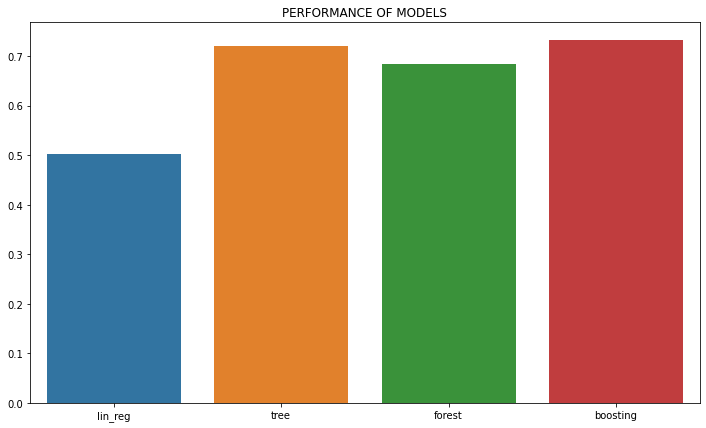

In [162]:
# plotting the performance of models
plt.figure(figsize=(12,7))
keys = list(models.keys())
values = list(models.values())
sns.barplot(x = keys, y = values)
plt.title('PERFORMANCE OF MODELS')
plt.show()

The score of boosting is clearly greater than the other models. So we will use boosting to predict the test dataset.

## **PREDICTION ON TEST DATASET**

In [163]:
# fitting boosting to the whole training dataset
boosting.fit(train_data, Y)

#prediction on testing dataset
Y_pred = boosting.predict(test_data)

In [164]:
Y_pred = pd.DataFrame(Y_pred)

In [165]:
Y_pred.to_csv('prediction.csv')

In [166]:
# downloading the predictions.csv file
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>